In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as ply
import datetime as dt
import pandas_datareader as dr

In [ ]:
start=dt.datetime(2020,1,1)
end=dt.datetime(2021,1,1)
df1=dr.data.get_data_yahoo('YESBANK.NS',start,end)
df2=dr.data.get_data_yahoo('TTM',start,end)
df3=dr.data.get_data_yahoo('ADANIPORTS.NS',start,end)
df3.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-01,379.250000,366.000000,368.000000,377.649994,11377167.0,373.521973
2020-01-02,384.700012,376.500000,377.950012,383.149994,5919760.0,378.961853
2020-01-03,384.350006,379.200012,382.700012,382.500000,3684824.0,378.318970
2020-01-06,388.000000,374.750000,388.000000,380.200012,12482680.0,376.044098
2020-01-07,389.750000,382.399994,384.049988,384.799988,8091465.0,380.593811


In [ ]:
df1.drop(['High','Low','Open','Close','Volume'],axis=1,inplace=True)
df1.head()

,Adj Close
Date,
2020-01-01,46.650002
2020-01-02,47.349998
2020-01-03,47.099998
2020-01-06,45.150002
2020-01-07,45.049999


In [ ]:
df2.drop(['High','Low','Open','Close','Volume'],axis=1,inplace=True)
df3.drop(['High','Low','Open','Close','Volume'],axis=1,inplace=True)

In [ ]:
df1.rename(columns = {'Adj Close':'Yes Bank Adj Close'}, inplace = True)
df2.rename(columns = {'Adj Close':'Tata Motors Adj Close'}, inplace = True)
df3.rename(columns = {'Adj Close':'Adani Ports Adj Close'}, inplace = True)
df1.head()

,Yes Bank Adj Close
Date,
2020-01-01,46.650002
2020-01-02,47.349998
2020-01-03,47.099998
2020-01-06,45.150002
2020-01-07,45.049999


In [ ]:
Table=pd.DataFrame()
Table=pd.concat([df1, df2, df3], axis=1)
Table.head()

,Yes Bank Adj Close,Tata Motors Adj Close,Adani Ports Adj Close
Date,,,
2020-01-01,46.650002,NaN,373.521973
2020-01-02,47.349998,13.52,378.961853
2020-01-03,47.099998,13.18,378.318970
2020-01-06,45.150002,13.03,376.044098
2020-01-07,45.049999,12.82,380.593811


In [ ]:
Table=np.log(Table/Table.shift(1))
Table.head()

,Yes Bank Adj Close,Tata Motors Adj Close,Adani Ports Adj Close
Date,,,
2020-01-01,NaN,NaN,NaN
2020-01-02,0.014894,NaN,0.014459
2020-01-03,-0.005294,-0.025470,-0.001698
2020-01-06,-0.042283,-0.011446,-0.006031
2020-01-07,-0.002217,-0.016248,0.012026


In [ ]:
Table.describe()

,Yes Bank Adj Close,Tata Motors Adj Close,Adani Ports Adj Close
count,241.000000,247.000000,241.000000
mean,-0.005434,-0.000324,0.001321
std,0.082348,0.045016,0.027815
min,-0.823578,-0.198262,-0.210163
25%,-0.021979,-0.019874,-0.010029
50%,-0.003795,-0.001053,0.001186
75%,0.017192,0.024333,0.014154
max,0.457971,0.146246,0.109083


In [ ]:
Table.describe().loc['std']

Yes Bank Adj Close       0.082348
Tata Motors Adj Close    0.045016
Adani Ports Adj Close    0.027815
Name: std, dtype: float64

In [ ]:
def weight_generator():
  rand=np.random.random(3)
  rand /=rand.sum()
  return rand


weight_generator()

array([0.38750967, 0.25162161, 0.36086872])

In [ ]:
def Mean_return(weight):
  return np.dot(Table.describe().loc['mean'],weight)

In [ ]:
Mean_return(weight_generator())

-0.00315302020748858

In [ ]:
def std(weight):
  a=np.dot(np.dot(Table.cov(),weight),weight)
  return a**(1/2)

In [ ]:
std(weight_generator())

0.03527279496955114

In [ ]:
returns=[]
deviations=[]
weights=[]


for i in range(0,1000):
  w=weight_generator()
  returns.append(Mean_return(w))
  deviations.append(std(w))
  weights.append(w)

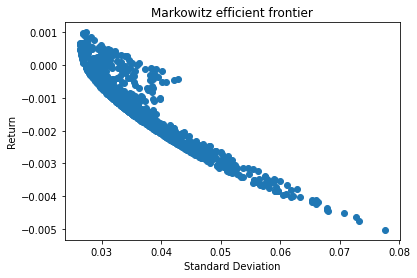

In [ ]:
ply.scatter(deviations,returns)
ply.title("Markowitz efficient frontier")
ply.xlabel("Standard Deviation")
ply.ylabel("Return")
ply.show()